# Data Visualization of the Ford Gobike Dataset
## by Naqeeb Tahasildar

## Investigation Overview

> The main goal of this project is to understand the relationship between trip duration and other variables such as gender, user type, time and day of the week.

## Dataset Overview

> The dataset contains 16 columns with different variables such as trip duration, start station, end station etc. The data contains 183412 observations. The 'user_type' and 'member_gender' contain qualitative nominal datatype.

In [34]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [35]:
df = pd.read_csv('/Users/naqeebtahasildar/Desktop/201902-fordgobike-tripdata.csv')

In [36]:
# Extract the day value from 'start_time', 'end_time' columns

df['start_day'] = (pd.to_datetime(df.start_time)).dt.strftime("%A")
df['end_day'] = (pd.to_datetime(df.end_time)).dt.strftime("%A")

In [37]:
# Convert 'user_type', 'member_gender' columns into categorical datatype

df['user_type'] = df.user_type.astype('category')
df['member_gender'] = df.member_gender.astype('category')

In [38]:
# convert birth year from float to integer

df['member_birth_year'] = df.member_birth_year.astype('Int32')

In [39]:
# extract time of the day from the start_

df['time'] = (pd.to_datetime(df.start_time)).dt.strftime("%H")

In [40]:
# formula to calculate the distance travelled using the Haversine formula
# source: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

def haversine_formula(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [41]:
# calculate the distance and store it distance column.

df['distance'] = haversine_formula(df['start_station_longitude'],df['start_station_latitude'],df['end_station_longitude'],df['end_station_latitude'])

In [42]:
# calculate the age of each individual

df['age'] = (2019 - df.member_birth_year)

In [43]:
# consider the indivduals with age equal to or below 90, as above this very few datapoints are present in the dataset

df_sub = df[df.age<=90]

In [44]:
bin_edges = [10,20,30,40,50,60,70,80,90]

In [45]:
bin_names = ['20s','30s','40s','50s','60s','70s','80s','90s']

In [46]:
df_sub['age_group'] = pd.cut(df_sub['age'], bin_edges, labels=bin_names)

<ipython-input-46-e19bb3e59760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['age_group'] = pd.cut(df_sub['age'], bin_edges, labels=bin_names)


In [47]:
# Convert the time variable into integer datatype

df.time = df.time.astype(int)

In [48]:
bin_1 = [0,3,7,11,15,19,23]

In [49]:
name_1 = ['Late Night', 'Early Morning', 'Morning', 'Afternoon','Evening', 'Night']

In [50]:
df['time_group'] = pd.cut(df['time'], bin_1, labels=name_1, include_lowest=True)

# Distribution of Trip Duration

The variable trip duration has a wide range of datapoints with the lowest and highest values being 60s and 85444s respectively. After plotting it on a logarithmic scale it shows a right skewed distribution with most of the datapoints below the 5k mark, the peak value is between 300-400s.

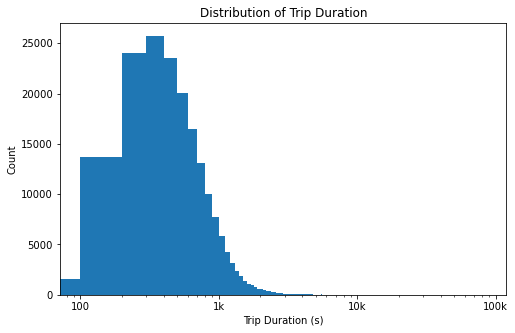

In [51]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, df.duration_sec.max()+100, 100)
plt.hist(data = df, x='duration_sec', bins = bins)
plt.xscale('log')
ticks = [1e2,1e3,1e4,1e5]
labels = [100,'1k','10k','100k']
plt.xticks(ticks,labels);
plt.xlabel('Trip Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration');

## Average Trip Duration vs User Type

It seems that on average customers use the service x2 longer than the subscribers.


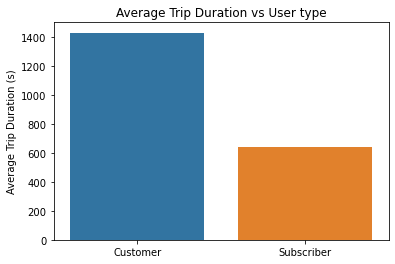

In [52]:
sb.barplot(data=df, x='user_type',y='duration_sec', ci=None)
plt.xlabel('')
plt.ylabel('Average Trip Duration (s)')
plt.title('Average Trip Duration vs User type');

## Average Trip Duration by Day and User Type

From the graph we observe that throughout the week customers consistently take much longer trips than subscribers. Also the average trip made by the subscribers is similar for different days of the week. However, customers seem to use the service longer on weekends than on weekdays.

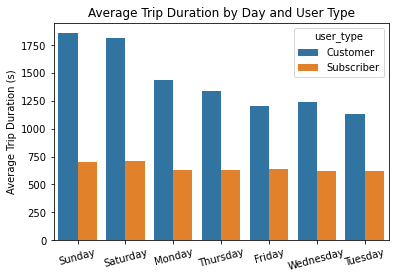

In [53]:
orders = ((df.groupby('start_day')['duration_sec'].mean()).sort_values(ascending=False)).index
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'start_day', y = 'duration_sec', hue = 'user_type', ci=None, order = orders)
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('Average Trip Duration (s)')
plt.title('Average Trip Duration by Day and User Type');

## Trip Duration for Different Genders

We see that average trip duration for different genders is similar with the other group taking slightly longer trips

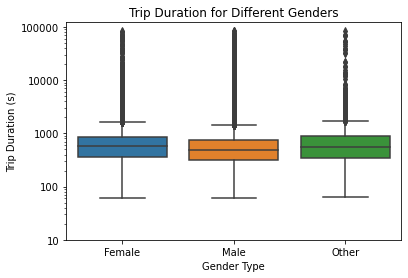

In [54]:
sb.boxplot(data=df, x='member_gender', y='duration_sec')
plt.yscale('log')
ticks = [10, 100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Gender Type')
plt.ylabel('Trip Duration (s)')
plt.title('Trip Duration for Different Genders');

##  Average Trip Duration by Day and Gender

We see that consistently for all the days of the week the other group uses the service for longer time as compared to male and female group

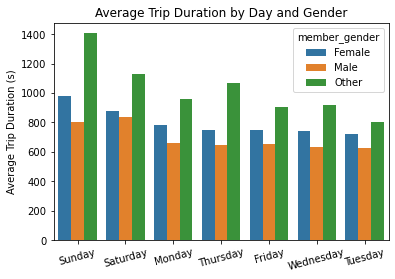

In [55]:
orders = ((df.groupby('start_day')['duration_sec'].mean()).sort_values(ascending=False)).index
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'start_day', y = 'duration_sec', hue = 'member_gender', ci=None, order = orders)
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('Average Trip Duration (s)')
plt.title('Average Trip Duration by Day and Gender');

## Average Trip Duration by User Type, Day of the Week and Time of the Day

Again we see a similar pattern from this plot that in a given day customers on average take longer trips than subscribers. Also, the average trip duraiton for the subscribers is similar whereas for customers it varies depending on the time of the day.

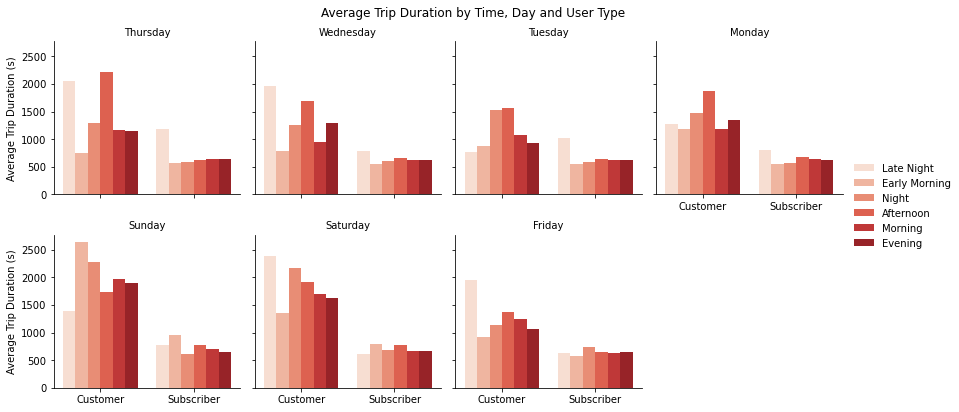

In [56]:
g = sb.FacetGrid(data = df, col = 'start_day', col_wrap=4)
g.map(sb.barplot, 'user_type', 'duration_sec', 'time_group', ci=None, 
      hue_order = df.time_group.value_counts().sort_values().index,
      order = ['Customer', 'Subscriber'],
      palette = 'Reds')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Average Trip Duration by Time, Day and User Type')
g.set_xlabels('')
g.set_ylabels('Average Trip Duration (s)')
g.set_titles('{col_name}')
g.add_legend();